<h1>2022.05.18. 강의 시간내 실습</h1>

In [65]:
import pandas as pd

abalone_data = pd.read_csv("C:/ai_dataset/abalone.data")

In [66]:
abalone_data

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in abalone_data.columns :
    abalone_data[i] = le.fit_transform(abalone_data[i])

In [68]:
abalone_data

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,2,45,36,17,285,178,94,113,6
1,0,81,67,26,962,480,280,374,8
2,2,63,56,24,718,400,225,273,9
3,1,41,34,15,253,159,76,87,6
4,1,60,43,18,463,254,152,207,7
...,...,...,...,...,...,...,...,...,...
4171,0,88,73,32,1289,698,475,442,10
4172,2,93,71,26,1411,832,426,463,9
4173,2,95,78,40,1727,994,571,550,8
4174,0,100,80,29,1610,1005,518,530,9


Text(0.5, 1.0, 'Class')

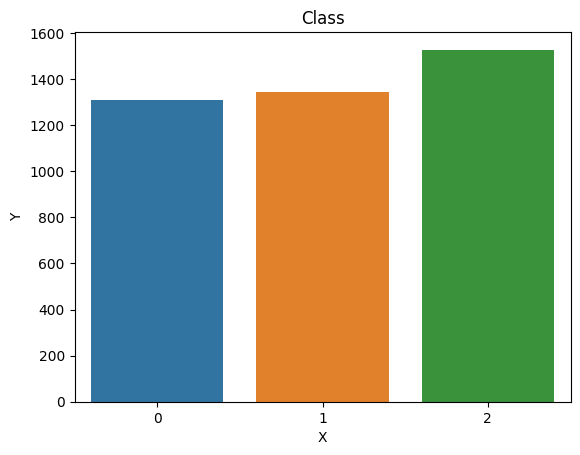

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data = abalone_data, x="M")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Class")

In [70]:
abalone_data.isna().sum()

M         0
0.455     0
0.365     0
0.095     0
0.514     0
0.2245    0
0.101     0
0.15      0
15        0
dtype: int64

In [71]:
from sklearn.model_selection import train_test_split

X = abalone_data.iloc[:,0:8].values
y = abalone_data['M']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)

In [72]:
import numpy as np

mean = np.mean(X_train, axis = 0)

std = np.std(X_train, axis = 0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [73]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))
print(np.any(np.isinf(X_train)))
print(np.any(np.isinf(X_test)))

False
False
False
False


In [74]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(8, )))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))


model.compile(optimizer='rmsprop', loss='mse', metrics = ['mae'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                576       
                                                                 
 dense_19 (Dense)            (None, 16)                1040      
                                                                 
 dense_20 (Dense)            (None, 8)                 136       
                                                                 
 dense_21 (Dense)            (None, 4)                 36        
                                                                 
 dense_22 (Dense)            (None, 2)                 10        
                                                                 
Total params: 1,798
Trainable params: 1,798
Non-trainable params: 0
_________________________________________________________________


In [75]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, batch_size=64, validation_split=0.2)

Epoch 1/100
42/42 [==============================] - 1s 5ms/step - loss: 0.6677 - mae: 0.6099 - val_loss: 0.1266 - val_mae: 0.2613
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0457 - mae: 0.1591 - val_loss: 0.0157 - val_mae: 0.0982
Epoch 3/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0134 - mae: 0.0901 - val_loss: 0.0079 - val_mae: 0.0690
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0080 - mae: 0.0692 - val_loss: 0.0053 - val_mae: 0.0546
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0064 - mae: 0.0595 - val_loss: 0.0064 - val_mae: 0.0589
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0049 - mae: 0.0512 - val_loss: 0.0088 - val_mae: 0.0655
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0043 - mae: 0.0452 - val_loss: 0.0037 - val_mae: 0.0441
Epoch 8/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0042 - m

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test, y_test)

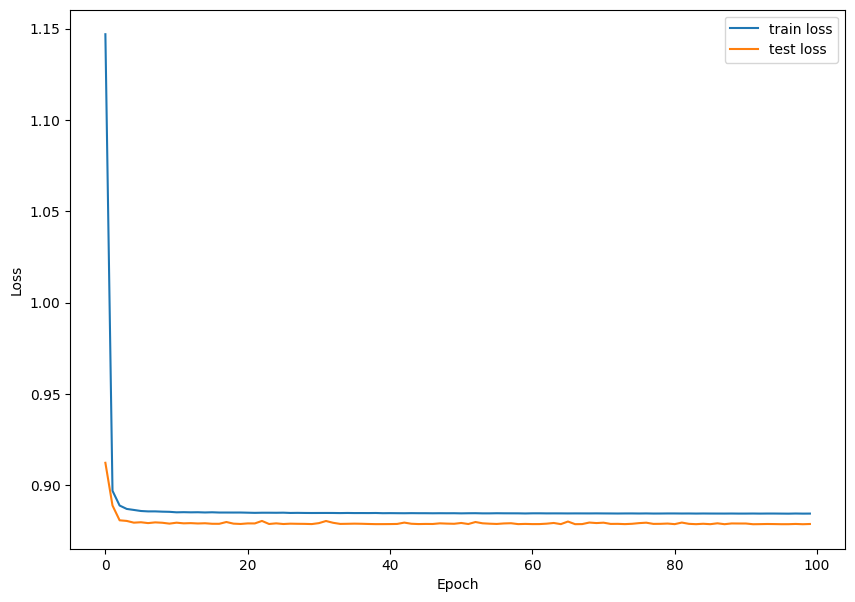

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

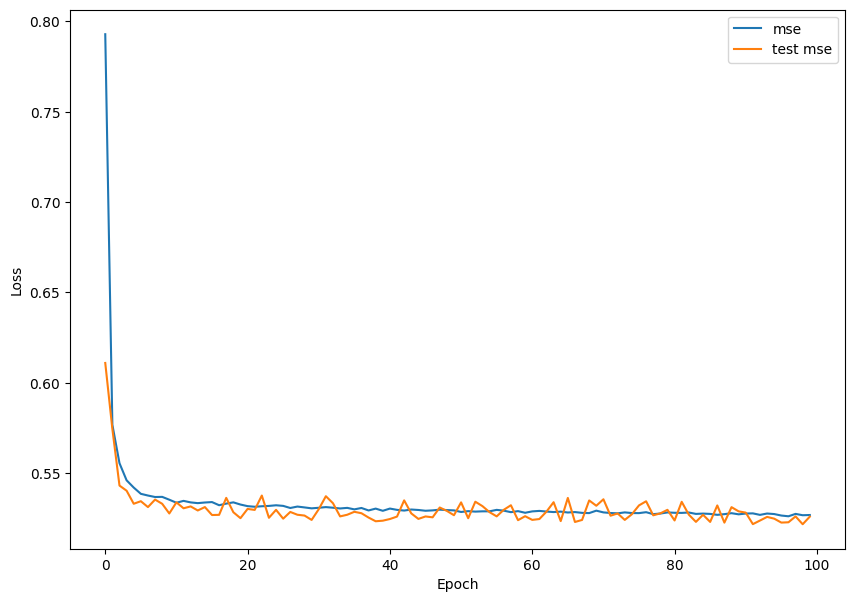

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mae'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mae'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()